In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [18]:
url='https://data.go.th/dataset/8a956917-436d-4afd-a2d4-59e4dd8e906e/resource/4688036a-cd89-45f7-a0c3-a34dbe35a50c/download/confirmed-cases-since-120465.xlsx'
# df=pd. read excel(url)
df=pd.read_excel(url, na_values=['ไม่ระบุ', '-', 'ไม่ทราบ'],
                 true_values=['YES'], false_values=['NO'])
df

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,3905873,2022-04-12,2022-04-11,หญิง,54,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,จอมทอง
1,3905874,2022-04-12,2022-04-11,หญิง,36,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,เมืองเชียงใหม่
2,3905875,2022-04-12,2022-04-11,หญิง,31,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,ดอยหล่อ
3,3905876,2022-04-12,2022-04-11,ชาย,37,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,NaN,ต่างจังหวัด
4,3905877,2022-04-12,2022-04-11,หญิง,33,ปี,Thailand,เชียงใหม่,อยู่ระหว่างการสอบสวน,เชียงใหม่,แม่ริม
...,...,...,...,...,...,...,...,...,...,...,...
356607,4262480,2022-05-01,2022-04-30,ชาย,NaN,NaN,NaN,พิษณุโลก,ทัณฑสถาน/เรือนจำ,NaN,NaN
356608,4262481,2022-05-01,2022-04-30,ชาย,NaN,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN
356609,4262482,2022-05-01,2022-04-30,หญิง,NaN,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN
356610,4262483,2022-05-01,2022-04-30,หญิง,NaN,NaN,NaN,ปทุมธานี,ทัณฑสถาน/เรือนจำ,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356612 entries, 0 to 356611
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   No.                    356612 non-null  int64         
 1   announce_date          356612 non-null  datetime64[ns]
 2   Notified date          356612 non-null  datetime64[ns]
 3   sex                    338957 non-null  object        
 4   age                    325395 non-null  object        
 5   Unit                   325395 non-null  object        
 6   nationality            324566 non-null  object        
 7   province_of_isolation  356612 non-null  object        
 8   risk                   356612 non-null  object        
 9   province_of_onset      321770 non-null  object        
 10  district_of_onset      312628 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 29.9+ MB


In [117]:
df.describe()

,No.,announce_date,Notified date,age
count,3.566120e+05,356612,356612,325395.000000
mean,4.084178e+06,2022-04-20 14:06:38.873846272,2022-04-19 14:07:16.427265536,40.757143
min,3.905873e+06,2022-04-12 00:00:00,2022-04-11 00:00:00,1.000000
25%,3.995026e+06,2022-04-16 00:00:00,2022-04-15 00:00:00,26.000000
50%,4.084178e+06,2022-04-20 00:00:00,2022-04-19 00:00:00,39.000000
75%,4.173331e+06,2022-04-25 00:00:00,2022-04-24 00:00:00,56.000000
max,4.262484e+06,2022-05-01 00:00:00,2022-04-30 00:00:00,485.000000
std,1.029452e+05,NaN,NaN,21.500119


In [118]:
import pandas as pd

df['age'] = df['age'].astype(float)

print(df.dtypes)

No.                               int64
announce_date            datetime64[ns]
Notified date            datetime64[ns]
sex                              object
age                             float64
Unit                             object
nationality                      object
province_of_isolation            object
risk                             object
province_of_onset                object
district_of_onset                object
dtype: object


In [25]:
df.age.mean()

40.7571426420197

In [26]:
df.age.unique()

array([ 54.  ,  36.  ,  31.  ,  37.  ,  33.  ,  12.  ,  32.  ,  55.  ,
        45.  ,  42.  ,  41.  ,  28.  ,  24.  ,  39.  ,  34.  ,  88.  ,
         9.  ,  43.  ,    nan,  26.  ,  44.  ,  46.  ,  68.  ,  67.  ,
         7.  ,  53.  ,  25.  ,  40.  ,  21.  ,  66.  ,  60.  ,  62.  ,
         3.  ,  29.  ,  65.  ,  61.  ,  82.  ,  13.  ,   2.  ,  51.  ,
         6.  ,  23.  ,  38.  ,  48.  ,  58.  ,  15.  ,  17.  ,  20.  ,
        59.  ,  69.  ,  35.  ,  49.  ,  63.  ,  30.  ,  71.  ,  14.  ,
        64.  ,  50.  ,  22.  ,  75.  ,  79.  ,   1.  ,  16.  ,  27.  ,
        57.  ,  73.  ,   5.  ,  77.  ,  19.  ,  10.  ,   4.  ,  47.  ,
        11.  ,  70.  ,  84.  ,  74.  ,   8.  ,  86.  ,  56.  ,  52.  ,
        87.  ,  78.  ,  92.  ,  80.  ,  90.  ,  72.  ,  18.  ,  81.  ,
        91.  ,  76.  ,  85.  ,  83.  ,  93.  ,  89.  ,  98.  ,  94.  ,
       100.  ,  99.  ,  95.  ,  97.  , 105.  ,  96.  ,  60.9 , 101.  ,
         1.1 ,   2.6 ,   1.5 ,   6.9 ,   1.11,   1.6 ,   1.7 ,   3.3 ,
      

In [27]:
df.sex.unique()

array(['หญิง', 'ชาย', nan], dtype=object)

In [28]:
df.sex.value_counts()

sex
หญิง    203340
ชาย     135617
Name: count, dtype: int64

In [99]:
df.sex.value_counts(normalize=True)*100

sex
หญิง    59.98991
ชาย     40.01009
Name: proportion, dtype: float64

In [31]:
df.province_of_onset.unique()

array(['เชียงใหม่', nan, 'เชียงราย', 'อุตรดิตถ์', 'น่าน', 'ลำปาง', 'แพร่',
       'แม่ฮ่องสอน', 'พะเยา', 'ลำพูน', 'พิษณุโลก', 'นครสวรรค์', 'พิจิตร',
       'กำแพงเพชร', 'สุโขทัย', 'เลย', 'นนทบุรี', 'เพชรบูรณ์', 'ตาก',
       'ชัยนาท', 'อุทัยธานี', 'กรุงเทพมหานคร', 'นครปฐม', 'ปทุมธานี',
       'สมุทรปราการ', 'พระนครศรีอยุธยา', 'กาญจนบุรี', 'ฉะเชิงเทรา',
       'สุพรรณบุรี', 'นครนายก', 'อุบลราชธานี', 'บุรีรัมย์', 'นครพนม',
       'หนองคาย', 'อุดรธานี', 'นครศรีธรรมราช', 'อ่างทอง', 'สระบุรี',
       'สมุทรสงคราม', 'สุรินทร์', 'นครราชสีมา', 'ลพบุรี', 'ชัยภูมิ',
       'กาฬสินธุ์', 'อำนาจเจริญ', 'ยโสธร', 'ขอนแก่น', 'สิงห์บุรี',
       'เพชรบุรี', 'สมุทรสาคร', 'ราชบุรี', 'ชลบุรี', 'สกลนคร', 'นนทบุุรี',
       'ประจวบคีรีขันธ์', 'อยุธยา', 'จันทบุรี', 'ระยอง', 'สระแก้ว',
       'ปราจีนบุรี', 'มหาสารคาม', 'หนองบัวลำภู', 'บุรีรัมย์์', 'ตราด',
       'ร้อยเอ็ด', 'บึงกาฬ', 'ศรีสะเกษ', 'มุกดาหาร', 'ตรัง',
       'สุราษฎร์ธานี', 'ระนอง', 'ภูเก็ต', 'กระบี่', 'พังงา', 'ชุมพร',
       'พัทลุง', 'นราธิวา

In [125]:
df.province_of_onset.value_counts().to_frame()

,count
province_of_onset,
กรุงเทพมหานคร,57632
ชลบุรี,12941
ขอนแก่น,12821
สมุทรปราการ,11826
นนทบุรี,10641
...,...
นครศรีธรรมราช​,1
ชอนแก่น,1
สุทรสาคร,1


In [65]:
df.risk.unique()

array(['อยู่ระหว่างการสอบสวน',
       'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้', 'อื่นๆ',
       'บุคลากรด้านการแพทย์และสาธารณสุข', 'ตรวจก่อนทำหัตถการ',
       'ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว',
       'การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน', 'ระบุไม่ได้',
       'สถานที่ทำงาน', 'ผู้ที่เดินทางมาจากต่างประเทศ และเข้า OQ',
       'Test and Go',
       'อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงานใกล้ชิดสัมผัสชาวต่างชาติ เป็นต้น',
       'พิธีกรรมทางศาสนา', 'สถานบันเทิง', 'สถานศึกษา', 'Phuket Sandbox',
       'ปอดอักเสบ (Pneumonia)', 'ทัณฑสถาน/เรือนจำ',
       'คนต่างชาติเดินทางมาจากต่างประเทศ',
       'ไปสถานที่แออัด เช่น งานแฟร์ คอนเสิร์ต', 'Phang nga Sandbox',
       'State Quarantine', 'ผู้ที่เดินทางมาจากต่างประเทศ และเข้า AQ',
       'Phang Nga Sandbox', 'Chonburi Sandbox', 'Phang Nga Sandbox ',
       'สัมผัสผู้เดินทางจากต่างประเทศ', 'สถานที่ทำงานที่มีการระบาด'],
      dtype=object)

In [68]:
df.risk.value_counts().to_frame()

,count
risk,
อื่นๆ,170039
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,123739
อยู่ระหว่างการสอบสวน,38828
บุคลากรด้านการแพทย์และสาธารณสุข,5622
ระบุไม่ได้,4429
สถานที่ทำงาน,3815
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,2448
ตรวจก่อนทำหัตถการ,1928
ปอดอักเสบ (Pneumonia),1382


In [138]:
selectPL=df[(df["risk"]=="บุคลากรด้านการแพทย์และสาธารณสุข")]

In [139]:
selectPL

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
85,3905958,2022-04-12,2022-04-11,หญิง,26.0,ปี,Thailand,เชียงใหม่,บุคลากรด้านการแพทย์และสาธารณสุข,เชียงใหม่,เมืองเชียงใหม่
558,3906431,2022-04-12,2022-04-11,หญิง,50.0,ปี,Thailand,แพร่,บุคลากรด้านการแพทย์และสาธารณสุข,แพร่,เมือง
559,3906432,2022-04-12,2022-04-11,ชาย,31.0,ปี,Thailand,แพร่,บุคลากรด้านการแพทย์และสาธารณสุข,แพร่,เมืองแพร่
560,3906433,2022-04-12,2022-04-11,หญิง,55.0,ปี,Thailand,แพร่,บุคลากรด้านการแพทย์และสาธารณสุข,แพร่,เมือง
561,3906434,2022-04-12,2022-04-11,ชาย,43.0,ปี,Thailand,แพร่,บุคลากรด้านการแพทย์และสาธารณสุข,แพร่,เมืองแพร่
...,...,...,...,...,...,...,...,...,...,...,...
354015,4259888,2022-05-01,2022-04-30,หญิง,27.0,ปี,Thailand,กรุงเทพมหานคร,บุคลากรด้านการแพทย์และสาธารณสุข,กรุงเทพมหานคร,วังทองหลาง
354016,4259889,2022-05-01,2022-04-30,หญิง,22.0,ปี,Thailand,กรุงเทพมหานคร,บุคลากรด้านการแพทย์และสาธารณสุข,สมุทรปราการ,เมืองสมุทรปราการ
354017,4259890,2022-05-01,2022-04-30,หญิง,30.0,ปี,Thailand,กรุงเทพมหานคร,บุคลากรด้านการแพทย์และสาธารณสุข,กรุงเทพมหานคร,บางนา
354018,4259891,2022-05-01,2022-04-30,หญิง,27.0,ปี,Thailand,กรุงเทพมหานคร,บุคลากรด้านการแพทย์และสาธารณสุข,สมุทรปราการ,เมืองสมุทรปราการ


<Axes: xlabel='province_of_onset', ylabel='count'>

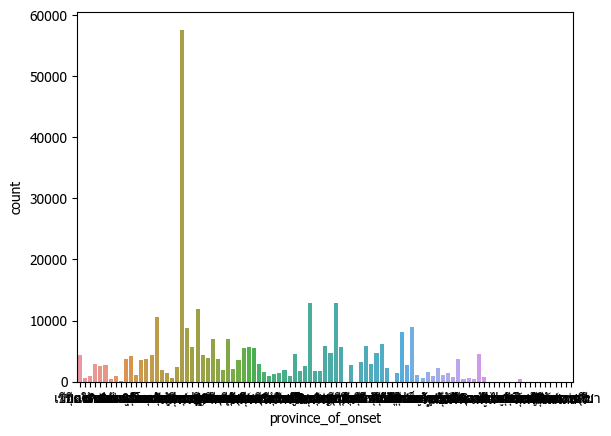

In [137]:
import seaborn as sns
sns.countplot(data=df, x="province_of_onset")

<Axes: xlabel='risk', ylabel='count'>

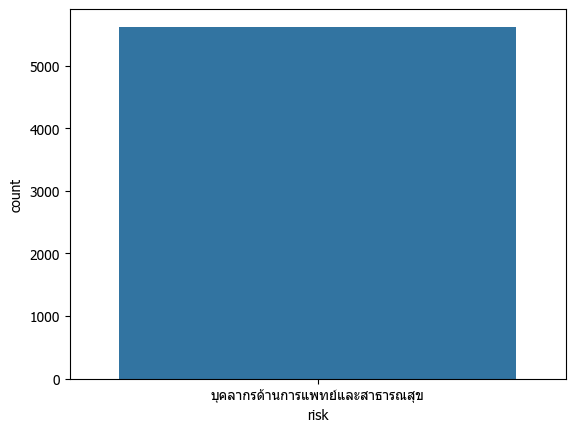

In [141]:
import seaborn as sns
sns.countplot(data=selectPL, x="risk")

In [76]:
plt.rcParams["font.family"]

['sans-serif']

In [93]:
# Set font to support Thai characters
plt.rcParams['font.family'] = ['Tahoma', 'sans-serif']